<a href="https://colab.research.google.com/github/Abhi23run/Python/blob/main/utility_functions/skeweness_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy scipy matplotlib seaborn

Jensen-Shannon Divergence: 0.0037754887424482444
Gini Coefficient (Original): 0.25000000000000006
Gini Coefficient (Fitted): 0.18500000000000003


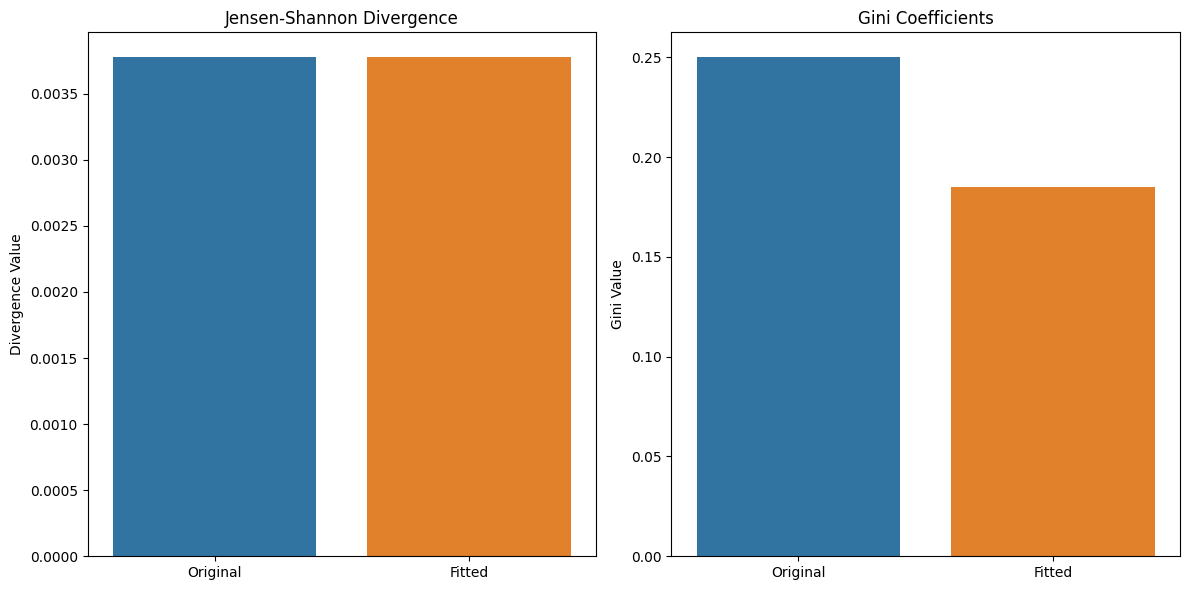

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import jensenshannon

def jensen_shannon_divergence(p, q):
    """Calculate the Jensen-Shannon Divergence."""
    p = np.array(p)
    p /= p.sum()
    q = np.array(q)
    q /= q.sum()
    return jensenshannon(p, q) ** 2

def gini_coefficient(array):
    """Calculate the Gini Coefficient."""
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))

# Example probability distributions
original_probabilities = np.array([0.1, 0.2, 0.3, 0.4])
fitted_probabilities = np.array([0.15, 0.18, 0.32, 0.35])

# Compute metrics
js_div = jensen_shannon_divergence(original_probabilities, fitted_probabilities)
gini_orig = gini_coefficient(original_probabilities)
gini_fitted = gini_coefficient(fitted_probabilities)

# Print the metrics
print(f"Jensen-Shannon Divergence: {js_div}")
print(f"Gini Coefficient (Original): {gini_orig}")
print(f"Gini Coefficient (Fitted): {gini_fitted}")

# Plotting
plt.figure(figsize=(12, 6))

# Jensen-Shannon Divergence Plot
plt.subplot(1, 2, 1)
sns.barplot(x=['Original', 'Fitted'], y=[js_div, js_div])
plt.title('Jensen-Shannon Divergence')
plt.ylabel('Divergence Value')

# Gini Coefficients Plot
plt.subplot(1, 2, 2)
sns.barplot(x=['Original', 'Fitted'], y=[gini_orig, gini_fitted])
plt.title('Gini Coefficients')
plt.ylabel('Gini Value')

plt.tight_layout()
plt.show()


KL divergence vs Jensen-Shannon Divergence

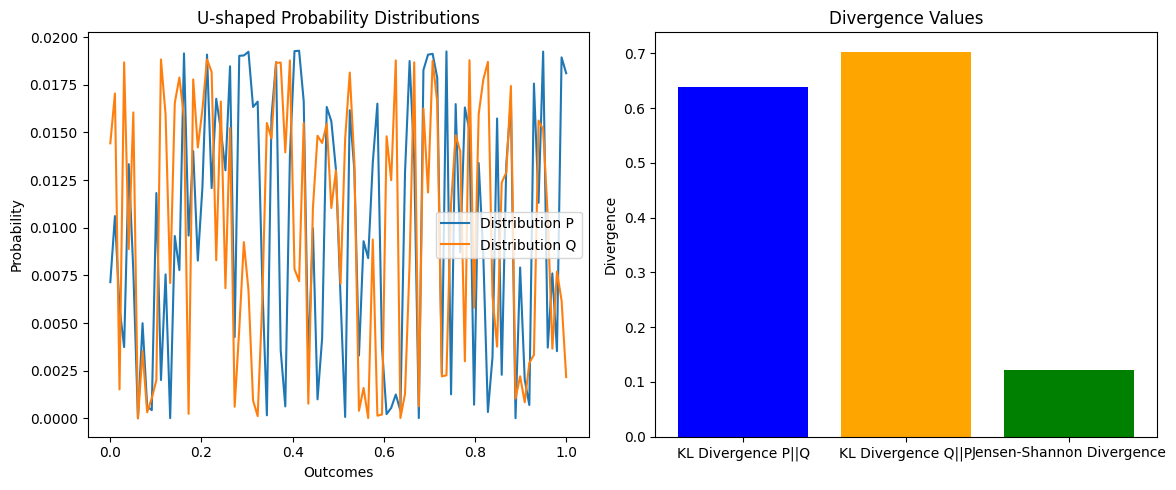

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon

def kl_divergence(p, q):
    """ Calculate KL divergence, ensuring no division by zero """
    return np.sum(np.where(p != 0, p * np.log(p / (q + 1e-15)), 0))

# Simulating U-shaped distributions
np.random.seed(0)
x = np.linspace(0, 1, 100)
p = np.random.beta(0.5, 0.5, 100)
q = np.random.beta(0.5, 0.5, 100)
p /= np.sum(p)
q /= np.sum(q)

# Compute KL and Jensen-Shannon divergences
kl_div_pq = kl_divergence(p, q)
kl_div_qp = kl_divergence(q, p)
js_div = jensenshannon(p, q) ** 2

# Plotting the distributions and the divergence values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, p, label='Distribution P')
plt.plot(x, q, label='Distribution Q')
plt.title('U-shaped Probability Distributions')
plt.xlabel('Outcomes')
plt.ylabel('Probability')
plt.legend()

plt.subplot(1, 2, 2)
bar_labels = ['KL Divergence P||Q', 'KL Divergence Q||P', 'Jensen-Shannon Divergence']
values = [kl_div_pq, kl_div_qp, js_div]
plt.bar(bar_labels, values, color=['blue', 'orange', 'green'])
plt.title('Divergence Values')
plt.ylabel('Divergence')

plt.tight_layout()
plt.show()
